In [1]:
import numpy as np
import alternatingStep_Wilson as alt
import opponent_models as om

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import random as rand

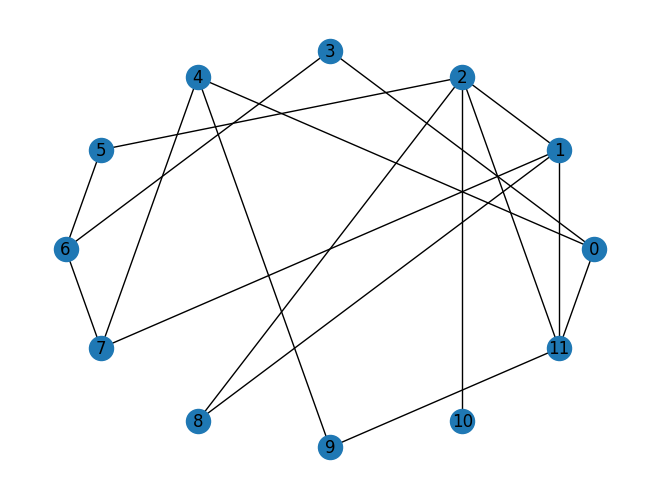

In [13]:
# create a random graph
ex_graph = alt.random_graph(12)
# visualize ex_graph using networkx
vis_ex_graph = ex_graph.copy()
# set diagonal to 0
np.fill_diagonal(vis_ex_graph, 0)
# make it a circle graph
pos = nx.circular_layout(nx.Graph(vis_ex_graph))
# draw the graph
nx.draw(nx.Graph(vis_ex_graph), pos, with_labels=True)
plt.show()

In [14]:
all_influences, all_configs = alt.get_all_configs(ex_graph, 2, 2)

In [15]:
all_influences

array([[6.83333333, 5.16666667],
       [6.75714286, 5.24285714],
       [6.83333333, 5.16666667],
       ...,
       [6.06834532, 5.93165468],
       [5.82459313, 6.17540687],
       [7.2920354 , 4.7079646 ]])

In [16]:
all_configs

array([[ 0,  1,  2,  3],
       [ 0,  1,  2,  4],
       [ 0,  1,  2,  5],
       ...,
       [11, 10,  9,  6],
       [11, 10,  9,  7],
       [11, 10,  9,  8]])

In [17]:
mask = np.ones(all_configs.shape[0], dtype=bool)
mask_temp = all_configs[:, 0] == 0
mask_temp &= all_configs[:, 2] == 2

In [18]:
all_configs[mask_temp]

array([[ 0,  1,  2,  3],
       [ 0,  1,  2,  4],
       [ 0,  1,  2,  5],
       [ 0,  1,  2,  6],
       [ 0,  1,  2,  7],
       [ 0,  1,  2,  8],
       [ 0,  1,  2,  9],
       [ 0,  1,  2, 10],
       [ 0,  1,  2, 11],
       [ 0,  3,  2,  1],
       [ 0,  3,  2,  4],
       [ 0,  3,  2,  5],
       [ 0,  3,  2,  6],
       [ 0,  3,  2,  7],
       [ 0,  3,  2,  8],
       [ 0,  3,  2,  9],
       [ 0,  3,  2, 10],
       [ 0,  3,  2, 11],
       [ 0,  4,  2,  1],
       [ 0,  4,  2,  3],
       [ 0,  4,  2,  5],
       [ 0,  4,  2,  6],
       [ 0,  4,  2,  7],
       [ 0,  4,  2,  8],
       [ 0,  4,  2,  9],
       [ 0,  4,  2, 10],
       [ 0,  4,  2, 11],
       [ 0,  5,  2,  1],
       [ 0,  5,  2,  3],
       [ 0,  5,  2,  4],
       [ 0,  5,  2,  6],
       [ 0,  5,  2,  7],
       [ 0,  5,  2,  8],
       [ 0,  5,  2,  9],
       [ 0,  5,  2, 10],
       [ 0,  5,  2, 11],
       [ 0,  6,  2,  1],
       [ 0,  6,  2,  3],
       [ 0,  6,  2,  4],
       [ 0,  6,  2,  5],


In [19]:
best_index = np.argmax(all_influences[mask_temp][:, 1])
all_influences[mask_temp][best_index]

array([6.4691358, 5.5308642])

In [20]:
all_configs[mask_temp][best_index]

array([ 0,  6,  2, 11])

In [21]:
om.opponent_smart(ex_graph, 2, 2)

(array([0., 2., 3., 4.]), array([3.66990291, 8.33009709]))

In [22]:
om.opponent_greedy_complete(ex_graph, 2, 2)

(array([ 0., 11.,  2.,  4.]), array([7.16129032, 4.83870968]))

In [24]:
def tester(n, N):
    graph = alt.random_graph(n)
    graph_array = graph
    best_configs = np.zeros(4)
    best_influences = np.zeros(2)

    smart_configs = np.zeros(4)
    smart_influences = np.zeros(2)

    dumb_2_configs = np.zeros(4)
    dumb_2_influences = np.zeros(2)

    greedy_configs = np.zeros(4)
    greedy_influences = np.zeros(2)

    for i in range(N):
        if i != 0:
            graph = alt.random_graph(n)
            graph_array = np.concatenate((graph_array, graph))

        all_influences, all_configs = alt.get_all_configs(graph, 2, 2)
        mask = all_configs[:,0] == 0
        mask &= all_configs[:,2] == 1

        best_index = np.argmax(all_influences[mask][:, 1])
        best_configs = np.vstack((best_configs, all_configs[mask][best_index]))
        best_influences = np.vstack((best_influences, all_influences[mask][best_index]))

        config_smart, influ_smart = om.opponent_smart(graph, 2, 2)

        config_dumb_2, influ_dumb_2 = alt.opponent_dumb_2(graph, 2, 2)

        config_greedy, influ_greedy = om.opponent_greedy_complete(graph, 2, 2)

        smart_configs = np.vstack((smart_configs, config_smart))
        smart_influences = np.vstack((smart_influences, influ_smart))

        dumb_2_configs = np.vstack((dumb_2_configs, config_dumb_2))
        dumb_2_influences = np.vstack((dumb_2_influences, influ_dumb_2))

        greedy_configs = np.vstack((greedy_configs, config_greedy))
        greedy_influences = np.vstack((greedy_influences, influ_greedy))

    return graph_array, best_configs[1:], smart_configs[1:], dumb_2_configs[1:], greedy_configs[1:], best_influences[1:], smart_influences[1:], dumb_2_influences[1:], greedy_influences[1:]


In [27]:
# Best, Smart, Dumb_2, Greedy
graph_array, best_configs, smart_configs, dumb_2_configs, greedy_configs, best_influences, smart_influences, dumb_2_influences, greedy_influences = tester(12, 4)

In [31]:
print(best_configs)
print(smart_configs)
print(greedy_configs)

[[ 0.  4.  1.  5.]
 [ 0.  2.  1. 10.]
 [ 0.  5.  1.  9.]
 [ 0.  5.  1. 10.]]
[[ 0.  1.  2. 10.]
 [ 0. 10.  1.  2.]
 [ 0.  5.  1.  9.]
 [ 0.  5.  1. 10.]]
[[ 0. 10.  1.  5.]
 [ 0. 10.  1.  2.]
 [ 0.  5.  1.  9.]
 [ 0.  5.  1. 10.]]


In [32]:
print(best_influences)
print(smart_influences)
print(greedy_influences)

[[6.53932584 5.46067416]
 [4.64285714 7.35714286]
 [2.5        9.5       ]
 [3.62765957 8.37234043]]
[[ 2.         10.        ]
 [ 4.64285714  7.35714286]
 [ 2.5         9.5       ]
 [ 3.62765957  8.37234043]]
[[6.53932584 5.46067416]
 [4.64285714 7.35714286]
 [2.5        9.5       ]
 [3.62765957 8.37234043]]


In [34]:
print(om.opponent_smart(alt.ex7, 2, 2, player=True))

(array([1., 4., 5., 2.]), array([4., 3.]))


In [36]:
all_influences_2, all_configs_2 = alt.get_all_configs(alt.ex7, 2, 2)

In [39]:
mask = all_configs_2[:,0] == 1
mask &= all_configs_2[:,1] == 4


In [40]:
all_influences_2[mask]

array([[2. , 5. ],
       [2.5, 4.5],
       [3. , 4. ],
       [3. , 4. ],
       [2.5, 4.5],
       [3. , 4. ],
       [3.5, 3.5],
       [3.5, 3.5],
       [3. , 4. ],
       [3. , 4. ],
       [4. , 3. ],
       [4. , 3. ],
       [4. , 3. ],
       [4. , 3. ],
       [4.5, 2.5],
       [4. , 3. ],
       [3.5, 3.5],
       [3.5, 3.5],
       [4. , 3. ],
       [4. , 3. ]])

In [41]:
mask = all_configs_2[:,0] == 1
mask &= all_configs_2[:,1] == 5

In [42]:
all_influences_2[mask]

array([[2. , 5. ],
       [2.5, 4.5],
       [3. , 4. ],
       [3.5, 3.5],
       [3. , 4. ],
       [3. , 4. ],
       [3.5, 3.5],
       [4. , 3. ],
       [3.5, 3.5],
       [3.5, 3.5],
       [4. , 3. ],
       [4.5, 2.5],
       [4. , 3. ],
       [3.5, 3.5],
       [3.5, 3.5],
       [5. , 2. ],
       [3.5, 3.5],
       [3. , 4. ],
       [3.5, 3.5],
       [4. , 3. ]])

In [ ]:
all_configs_2[mask]

#Smart vs Smart

In [70]:
config = np.array([])
nodes_per_team = 2
ksym = 2
graph_laplacian = alt.random_graph(12)

all_influences, permutations = alt.get_all_configs(graph_laplacian=graph_laplacian,
                                               nodes_per_team=nodes_per_team,
                                               ksym=ksym)


In [71]:
config = om.opponent_smart_step(graph_laplacian, config, nodes_per_team, ksym, all_influences, permutations)
config

array([5.])

In [72]:
config = om.opponent_smart_step(graph_laplacian, config, nodes_per_team, ksym, all_influences, permutations)
config

array([5., 2.])

In [73]:
config = om.opponent_smart_step(graph_laplacian, config, nodes_per_team, ksym, all_influences, permutations)
config

array([5., 2., 6.])

In [74]:
config = om.opponent_smart_step(graph_laplacian, config, nodes_per_team, ksym, all_influences, permutations)
config

array([5., 2., 6., 4.])

In [75]:
print(om.opponent_smart(graph_laplacian, nodes_per_team, ksym))

(array([0., 5., 1., 6.]), array([3.10344828, 8.89655172]))


In [76]:
print(om.opponent_smart(graph_laplacian, nodes_per_team, ksym, player=True))

(array([5., 2., 6., 4.]), array([7.14285714, 4.85714286]))


In [77]:
configs_recursive = om.opponent_smart_recursive_check(graph_laplacian, nodes_per_team, ksym)[0].astype(int)

In [78]:
print(configs_recursive)

[[ 0  5  1  6]
 [ 0  5  2  6]
 [ 0  5  3  4]
 [ 0  5  4 11]
 [ 0  5  6  2]
 [ 0  5  7  9]
 [ 0  5  8  2]
 [ 0  5  9  7]
 [ 0  5 10  1]
 [ 0  5 11  2]
 [ 1  5  0  6]
 [ 1  5  2 11]
 [ 1  5  3  6]
 [ 1  5  4  2]
 [ 1  5  6  2]
 [ 1  5  7  6]
 [ 1  5  8  2]
 [ 1  5  9  6]
 [ 1  5 10  6]
 [ 1  5 11  2]
 [ 2  5  0  6]
 [ 2  5  1 11]
 [ 2  5  3  6]
 [ 2  5  4  6]
 [ 2  5  6  1]
 [ 2  5  7  6]
 [ 2  5  8  6]
 [ 2  5  9  6]
 [ 2  5 10  6]
 [ 2  5 11  6]
 [ 3  8  0  5]
 [ 3  8  1  4]
 [ 3  8  2  4]
 [ 3  8  4  5]
 [ 3  8  5  4]
 [ 3  8  6  4]
 [ 3  8  7  5]
 [ 3  8  9  5]
 [ 3  8 10  4]
 [ 3  8 11  4]
 [ 4  8  0  5]
 [ 4  8  1  5]
 [ 4  8  2  5]
 [ 4  8  3  5]
 [ 4  8  5  7]
 [ 4  8  6  5]
 [ 4  8  7  5]
 [ 4  8  9  5]
 [ 4  8 10  5]
 [ 4  8 11  5]
 [ 5  2  0  4]
 [ 5  2  1  4]
 [ 5  2  3  7]
 [ 5  2  4  7]
 [ 5  2  6  4]
 [ 5  2  7  4]
 [ 5  2  8  4]
 [ 5  2  9  4]
 [ 5  2 10  4]
 [ 5  2 11  4]
 [ 6  5  0  2]
 [ 6  5  1  2]
 [ 6  5  2  1]
 [ 6  5  3  2]
 [ 6  5  4  2]
 [ 6  5  7  2]
 [ 6  5  8

In [79]:
configs_tuples = list(map(tuple, configs_recursive))
configs_tuples

[(0, 5, 1, 6),
 (0, 5, 2, 6),
 (0, 5, 3, 4),
 (0, 5, 4, 11),
 (0, 5, 6, 2),
 (0, 5, 7, 9),
 (0, 5, 8, 2),
 (0, 5, 9, 7),
 (0, 5, 10, 1),
 (0, 5, 11, 2),
 (1, 5, 0, 6),
 (1, 5, 2, 11),
 (1, 5, 3, 6),
 (1, 5, 4, 2),
 (1, 5, 6, 2),
 (1, 5, 7, 6),
 (1, 5, 8, 2),
 (1, 5, 9, 6),
 (1, 5, 10, 6),
 (1, 5, 11, 2),
 (2, 5, 0, 6),
 (2, 5, 1, 11),
 (2, 5, 3, 6),
 (2, 5, 4, 6),
 (2, 5, 6, 1),
 (2, 5, 7, 6),
 (2, 5, 8, 6),
 (2, 5, 9, 6),
 (2, 5, 10, 6),
 (2, 5, 11, 6),
 (3, 8, 0, 5),
 (3, 8, 1, 4),
 (3, 8, 2, 4),
 (3, 8, 4, 5),
 (3, 8, 5, 4),
 (3, 8, 6, 4),
 (3, 8, 7, 5),
 (3, 8, 9, 5),
 (3, 8, 10, 4),
 (3, 8, 11, 4),
 (4, 8, 0, 5),
 (4, 8, 1, 5),
 (4, 8, 2, 5),
 (4, 8, 3, 5),
 (4, 8, 5, 7),
 (4, 8, 6, 5),
 (4, 8, 7, 5),
 (4, 8, 9, 5),
 (4, 8, 10, 5),
 (4, 8, 11, 5),
 (5, 2, 0, 4),
 (5, 2, 1, 4),
 (5, 2, 3, 7),
 (5, 2, 4, 7),
 (5, 2, 6, 4),
 (5, 2, 7, 4),
 (5, 2, 8, 4),
 (5, 2, 9, 4),
 (5, 2, 10, 4),
 (5, 2, 11, 4),
 (6, 5, 0, 2),
 (6, 5, 1, 2),
 (6, 5, 2, 1),
 (6, 5, 3, 2),
 (6, 5, 4, 2),
 (6, 5, 7,

In [80]:
permutations = list(map(tuple, permutations))
influ_dict = dict(zip(permutations, all_influences))

In [81]:
influ_list = np.array([influ_dict[configs_tuples[i]] for i in range(len(configs_tuples))])

In [82]:
for i in range(len(configs_tuples)):
    print(configs_tuples[i], influ_dict[configs_tuples[i]])

(0, 5, 1, 6) [3.10344828 8.89655172]
(0, 5, 2, 6) [4.19047619 7.80952381]
(0, 5, 3, 4) [ 2. 10.]
(0, 5, 4, 11) [3. 9.]
(0, 5, 6, 2) [3.28571429 8.71428571]
(0, 5, 7, 9) [ 2. 10.]
(0, 5, 8, 2) [3.5 8.5]
(0, 5, 9, 7) [ 2. 10.]
(0, 5, 10, 1) [3.03703704 8.96296296]
(0, 5, 11, 2) [3. 9.]
(1, 5, 0, 6) [3.10344828 8.89655172]
(1, 5, 2, 11) [4.4 7.6]
(1, 5, 3, 6) [3.88 8.12]
(1, 5, 4, 2) [4.8 7.2]
(1, 5, 6, 2) [2.8 9.2]
(1, 5, 7, 6) [3.60344828 8.39655172]
(1, 5, 8, 2) [3.5 8.5]
(1, 5, 9, 6) [3.60344828 8.39655172]
(1, 5, 10, 6) [2.77777778 9.22222222]
(1, 5, 11, 2) [4.3 7.7]
(2, 5, 0, 6) [4.19047619 7.80952381]
(2, 5, 1, 11) [4.4 7.6]
(2, 5, 3, 6) [4.25714286 7.74285714]
(2, 5, 4, 6) [4.85714286 7.14285714]
(2, 5, 6, 1) [3.93333333 8.06666667]
(2, 5, 7, 6) [4.69047619 7.30952381]
(2, 5, 8, 6) [4.33333333 7.66666667]
(2, 5, 9, 6) [4.69047619 7.30952381]
(2, 5, 10, 6) [4.5 7.5]
(2, 5, 11, 6) [3.85714286 8.14285714]
(3, 8, 0, 5) [3. 9.]
(3, 8, 1, 4) [3.5 8.5]
(3, 8, 2, 4) [4. 8.]
(3, 8, 4, 5) [

# Smart vs Smart again but looping

In [4]:
nodes_per_team = 2
ksym = 2

In [131]:
N = 100
ratio = np.array([0, 0, 0])
data = []
winner_index = []
for n in range(N):
    config = np.array([])
    graph_laplacian = alt.random_graph(14)

    # how to store graphs using dstack
    if n == 0:
        ex_graphs = graph_laplacian
    else:
        # efficient way to store the graphs using np.dstack
        ex_graphs = np.dstack((ex_graphs, graph_laplacian))

    all_influences, permutations = alt.get_all_configs(graph_laplacian=graph_laplacian,
                                                   nodes_per_team=nodes_per_team,
                                                   ksym=ksym)
    for i in range(nodes_per_team * ksym):
        config = om.opponent_smart_step(graph_laplacian, config, nodes_per_team, ksym, all_influences, permutations)
    permutations = list(map(tuple, permutations))
    influ_dict = dict(zip(permutations, all_influences))
    data.append((config, influ_dict[tuple(config)]))
    if influ_dict[tuple(config)][0] > 6:
        ratio[0] += 1
        winner_index.append(1)
    elif influ_dict[tuple(config)][0] < 6:
        ratio[1] += 1
        winner_index.append(-1)
    else:
        ratio[2] += 1
        winner_index.append(0)
print(ratio)

[99  1  0]


In [107]:
print(winner_index)

[1, 1, 1, 1, 1, -1, 1, 1, 1, 0, 0, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 0, 1, -1]


In [108]:
# Visualize the losing graphs
ex_graphs[:,:,5]

array([[ 4, -1, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0],
       [-1,  4,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0],
       [-1,  0,  2,  0,  0,  0,  0,  0, -1,  0,  0,  0],
       [ 0, -1,  0,  3,  0, -1,  0,  0, -1,  0,  0,  0],
       [-1, -1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  2,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  3, -1,  0, -1, -1,  0],
       [ 0, -1,  0,  0,  0,  0, -1,  3,  0, -1,  0,  0],
       [-1,  0, -1, -1,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1, -1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1]], dtype=int32)

In [100]:
data

[(array([ 3., 11.,  4.,  8.]), array([5.75, 6.25])),
 (array([9., 0., 1., 6.]), array([6.85762712, 5.14237288])),
 (array([10.,  6.,  2.,  4.]), array([6.57692308, 5.42307692])),
 (array([10.,  1.,  8.,  3.]), array([5.5, 6.5])),
 (array([3., 8., 6., 1.]), array([6.6, 5.4])),
 (array([5., 6., 3., 4.]), array([6.42084942, 5.57915058])),
 (array([5., 4., 6., 0.]), array([5.76, 6.24])),
 (array([8., 9., 5., 4.]), array([6.5, 5.5])),
 (array([ 2.,  0.,  3., 11.]), array([5.51807229, 6.48192771])),
 (array([ 3.,  7., 11.,  9.]), array([6.55102041, 5.44897959])),
 (array([3., 7., 1., 4.]), array([6.6, 5.4])),
 (array([4., 2., 9., 8.]), array([5.98644068, 6.01355932])),
 (array([ 9.,  8.,  5., 11.]), array([6.04945055, 5.95054945])),
 (array([ 2.,  3., 11.,  4.]), array([6.86097427, 5.13902573])),
 (array([ 3.,  9.,  5., 10.]), array([7.06870229, 4.93129771])),
 (array([10.,  6.,  2., 11.]), array([7.3, 4.7])),
 (array([8., 2., 4., 1.]), array([6.9, 5.1])),
 (array([ 1., 10.,  9.,  2.]), arra

# Minimax vs Smart

In [35]:
N = 1000
ratio_0 = np.array([0, 0, 0, 0])
ratio_1 = np.array([0, 0, 0, 0])
ratio_2 = np.array([0, 0, 0, 0])
ratio_3 = np.array([0, 0, 0, 0])

winner_index_0 = []
winner_index_1 = []
winner_index_2 = []
winner_index_3 = []

S = 11

ex_graphs = alt.random_graph(S)

for i in range(N - 1):
    graph_laplacian = alt.random_graph(S)
    ex_graphs = np.dstack((ex_graphs, graph_laplacian))

In [36]:
### Minimax vs Smart
for n in range(N):
    config = np.array([])
    graph_laplacian = ex_graphs[:,:,n]

    all_influences, permutations = alt.get_all_configs(graph_laplacian=graph_laplacian,
                                                   nodes_per_team=nodes_per_team,
                                                   ksym=ksym)
    for i in range(nodes_per_team * ksym // 2):
        _, next = om.minimax(graph_laplacian, config, nodes_per_team, ksym, 0)
        config = np.append(config, next)
        config, _ = om.opponent_smart_step(graph_laplacian, config, nodes_per_team, ksym, all_influences, permutations)

    permutations = list(map(tuple, permutations))
    influ_dict = dict(zip(permutations, all_influences))
    # data.append((config, influ_dict[tuple(config)]))
    if abs(influ_dict[tuple(config)][0] - (S / 2)) < 0.0001 :
        ratio_0[2] += 1
        winner_index_0.append(0)
    elif influ_dict[tuple(config)][0] > S / 2:
        ratio_0[0] += 1
        winner_index_0.append(1)
    elif influ_dict[tuple(config)][0] < S / 2:
        ratio_0[1] += 1
        winner_index_0.append(-1)
    else:
        ratio_0[3] += 1
        winner_index_0.append(np.inf)
print(ratio_0)

KeyboardInterrupt: 

In [ ]:
### Smart vs Smart with the same graphs as Minimax vs Smart
for n in range(N):
    config = np.array([])
    graph_laplacian = ex_graphs[:,:,n]

    all_influences, permutations = alt.get_all_configs(graph_laplacian=graph_laplacian,
                                                   nodes_per_team=nodes_per_team,
                                                   ksym=ksym)
    for i in range(nodes_per_team * ksym):
        config, _ = om.opponent_smart_step(graph_laplacian, config, nodes_per_team, ksym, all_influences, permutations)

    permutations = list(map(tuple, permutations))
    influ_dict = dict(zip(permutations, all_influences))
    data.append((config, influ_dict[tuple(config)]))
    if abs(influ_dict[tuple(config)][0] - (S / 2)) < 0.0001 :
        ratio_1[2] += 1
        winner_index_1.append(0)
    elif influ_dict[tuple(config)][0] > S / 2:
        ratio_1[0] += 1
        winner_index_1.append(1)
    elif influ_dict[tuple(config)][0] < S / 2:
        ratio_1[1] += 1
        winner_index_1.append(-1)
    else:
        ratio_1[3] += 1
        winner_index_1.append(np.inf)
print(ratio_1)

In [ ]:
### Minimax vs Minimax with the same graphs as Minimax vs Smart
for n in range(N):
    config = np.array([])
    graph_laplacian = ex_graphs[:,:,n]

    all_influences, permutations = alt.get_all_configs(graph_laplacian=graph_laplacian,
                                                   nodes_per_team=nodes_per_team,
                                                   ksym=ksym)
    for i in range(nodes_per_team * ksym):
        _, next = om.minimax(graph_laplacian, config, nodes_per_team, ksym, i % 2)
        config = np.append(config, next)

    permutations = list(map(tuple, permutations))
    influ_dict = dict(zip(permutations, all_influences))
    # data.append((config, influ_dict[tuple(config)]))
    if abs(influ_dict[tuple(config)][0] - (S / 2)) < 0.0001 :
        ratio_2[2] += 1
        winner_index_2.append(0)
    elif influ_dict[tuple(config)][0] > S / 2:
        ratio_2[0] += 1
        winner_index_2.append(1)
    elif influ_dict[tuple(config)][0] < S / 2:
        ratio_2[1] += 1
        winner_index_2.append(-1)
    else:
        ratio_2[3] += 1
        winner_index_2.append(np.inf)
print(ratio_2)

In [ ]:
### Smart vs Minimax with the same graphs as Minimax vs Smart
for n in range(N):
    config = np.array([])
    graph_laplacian = ex_graphs[:,:,n]

    all_influences, permutations = alt.get_all_configs(graph_laplacian=graph_laplacian,
                                                   nodes_per_team=nodes_per_team,
                                                   ksym=ksym)
    for i in range(nodes_per_team * ksym // 2):
        config, _ = om.opponent_smart_step(graph_laplacian, config, nodes_per_team, ksym, all_influences, permutations)
        _, next = om.minimax(graph_laplacian, config, nodes_per_team, ksym, 1)
        config = np.append(config, next)


    permutations = list(map(tuple, permutations))
    influ_dict = dict(zip(permutations, all_influences))
    # data.append((config, influ_dict[tuple(config)]))
    if abs(influ_dict[tuple(config)][0] - (S / 2)) < 0.0001 :
        ratio_3[2] += 1
        winner_index_3.append(0)
    elif influ_dict[tuple(config)][0] > S / 2:
        ratio_3[0] += 1
        winner_index_3.append(1)
    elif influ_dict[tuple(config)][0] < S / 2:
        ratio_3[1] += 1
        winner_index_3.append(-1)
    else:
        ratio_3[3] += 1
        winner_index_3.append(np.inf)
print(ratio_3)

# All in one

In [11]:
N = 1000
S = 8
nodes_per_team = 2
ksym = 2

ratio_0 = np.array([0, 0, 0, 0])
ratio_1 = np.array([0, 0, 0, 0])
ratio_2 = np.array([0, 0, 0, 0])
ratio_3 = np.array([0, 0, 0, 0])

winner_index_0 = []
winner_index_1 = []
winner_index_2 = []
winner_index_3 = []

ex_graphs = alt.random_graph(S)

for i in range(N - 1):
    graph_laplacian = alt.random_graph(S)
    ex_graphs = np.dstack((ex_graphs, graph_laplacian))

In [12]:
for n in range(N):
    config_0 = np.array([])
    config_1 = np.array([])
    config_2 = np.array([])
    config_3 = np.array([])

    graph_laplacian = ex_graphs[:,:,n]

    all_influences, permutations = alt.get_all_configs(graph_laplacian=graph_laplacian,
                                                   nodes_per_team=nodes_per_team,
                                                   ksym=ksym)

    for i in range(nodes_per_team * ksym // 2):
        # Minimax vs Smart
        _, next = om.minimax(graph_laplacian, config_0, nodes_per_team, ksym, 0)
        config_0 = np.append(config_0, next)
        config_0, _ = om.opponent_smart_step(graph_laplacian, config_0, nodes_per_team, ksym, all_influences, permutations)

        # Smart vs Minimax
        config_1, _ = om.opponent_smart_step(graph_laplacian, config_1, nodes_per_team, ksym, all_influences, permutations)
        _, next = om.minimax(graph_laplacian, config_1, nodes_per_team, ksym, 1)
        config_1 = np.append(config_1, next)

    for i in range(nodes_per_team * ksym):
        # Minimax vs Minimax
        _, next = om.minimax(graph_laplacian, config_2, nodes_per_team, ksym, i % 2)
        config_2 = np.append(config_2, next)

        # Smart vs Smart
        config_3, _ = om.opponent_smart_step(graph_laplacian, config_3, nodes_per_team, ksym, all_influences, permutations)

    permutations = list(map(tuple, permutations))
    influ_dict = dict(zip(permutations, all_influences))

    # Minimax vs Smart
    if abs(influ_dict[tuple(config_0)][0] - (S / 2)) < 0.0001 :
        ratio_0[2] += 1
        winner_index_0.append(0)
    elif influ_dict[tuple(config_0)][0] > S / 2:
        ratio_0[0] += 1
        winner_index_0.append(1)
    elif influ_dict[tuple(config_0)][0] < S / 2:
        ratio_0[1] += 1
        winner_index_0.append(-1)
    else:
        ratio_0[3] += 1
        winner_index_0.append(np.inf)

    # Smart vs Minimax
    if abs(influ_dict[tuple(config_1)][0] - (S / 2)) < 0.0001 :
        ratio_1[2] += 1
        winner_index_1.append(0)
    elif influ_dict[tuple(config_1)][0] > S / 2:
        ratio_1[0] += 1
        winner_index_1.append(1)
    elif influ_dict[tuple(config_1)][0] < S / 2:
        ratio_1[1] += 1
        winner_index_1.append(-1)
    else:
        ratio_1[3] += 1
        winner_index_1.append(np.inf)

    # Minimax vs Minimax
    if abs(influ_dict[tuple(config_2)][0] - (S / 2)) < 0.0001 :
        ratio_2[2] += 1
        winner_index_2.append(0)
    elif influ_dict[tuple(config_2)][0] > S / 2:
        ratio_2[0] += 1
        winner_index_2.append(1)
    elif influ_dict[tuple(config_2)][0] < S / 2:
        ratio_2[1] += 1
        winner_index_2.append(-1)
    else:
        ratio_2[3] += 1
        winner_index_2.append(np.inf)

    # Smart vs Smart
    if abs(influ_dict[tuple(config_3)][0] - (S / 2)) < 0.0001 :
        ratio_3[2] += 1
        winner_index_3.append(0)
    elif influ_dict[tuple(config_3)][0] > S / 2:
        ratio_3[0] += 1
        winner_index_3.append(1)
    elif influ_dict[tuple(config_3)][0] < S / 2:
        ratio_3[1] += 1
        winner_index_3.append(-1)
    else:
        ratio_3[3] += 1
        winner_index_3.append(np.inf)
print('Done')

Done


In [13]:
print(f'S = {S}, N = {N}')
print('Minimax vs Smart\t', ratio_0)
print('Smart vs Minimax\t', ratio_1)
print('Minimax vs Minimax\t', ratio_2)
print('Smart vs Smart\t\t', ratio_3)

S = 10, N = 1000
Minimax vs Smart	 [905   4  91   0]
Smart vs Minimax	 [514 363 123   0]
Minimax vs Minimax	 [851   5 144   0]
Smart vs Smart		 [677 219 104   0]


In [18]:
print(np.arange(1000)[np.array(winner_index_0) < 0])

[ 32 186 548 563]


In [19]:
print(np.arange(1000)[np.array(winner_index_2) < 0])

[ 32 186 388 548 563]


In [20]:
print(ex_graphs[:, :, 32])

[[ 5 -1  0  0 -1 -1  0  0 -1 -1]
 [-1  3  0  0  0  0 -1  0 -1  0]
 [ 0  0  2  0 -1 -1  0  0  0  0]
 [ 0  0  0  1  0  0  0 -1  0  0]
 [-1  0 -1  0  3  0  0  0 -1  0]
 [-1  0 -1  0  0  2  0  0  0  0]
 [ 0 -1  0  0  0  0  2  0 -1  0]
 [ 0  0  0 -1  0  0  0  2  0 -1]
 [-1 -1  0  0 -1  0 -1  0  5 -1]
 [-1  0  0  0  0  0  0 -1 -1  3]]


In [341]:
ex_graphs2 = np.load('ex_graphs.npy')
sample_1_lap = ex_graphs2[:, :, 186].copy()

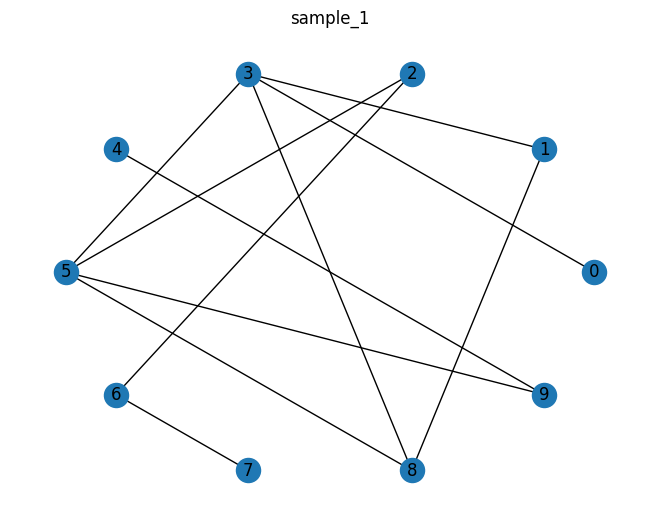

In [20]:
sample_0 = ex_graphs[:, :, 32].copy()
sample_1 = ex_graphs[:, :, 186].copy()
sample_2 = ex_graphs[:, :, 388].copy()
sample_3 = ex_graphs[:, :, 548].copy()
sample_4 = ex_graphs[:, :, 563].copy()
np.fill_diagonal(sample_0, 0)
np.fill_diagonal(sample_1, 0)
np.fill_diagonal(sample_2, 0)
np.fill_diagonal(sample_3, 0)
np.fill_diagonal(sample_4, 0)

# visualize ex_graph using networkx
vis_ex_graph = sample_1.copy()
# set diagonal to 0
np.fill_diagonal(vis_ex_graph, 0)
# make it a circle graph
pos = nx.circular_layout(nx.Graph(vis_ex_graph))
# draw the graph
nx.draw(nx.Graph(vis_ex_graph), pos, with_labels=True)
plt.title('sample_1')
plt.show()
# vis_ex_graph_1 = sample_1.copy()
# np.fill_diagonal(vis_ex_graph_1, 0)
# nx.draw(nx.Graph(vis_ex_graph_1), pos, with_labels=True)

In [342]:
print(sample_1_lap)

[[ 1  0  0 -1  0  0  0  0  0  0]
 [ 0  2  0 -1  0  0  0  0 -1  0]
 [ 0  0  2  0  0 -1 -1  0  0  0]
 [-1 -1  0  4  0 -1  0  0 -1  0]
 [ 0  0  0  0  1  0  0  0  0 -1]
 [ 0  0 -1 -1  0  4  0  0 -1 -1]
 [ 0  0 -1  0  0  0  2 -1  0  0]
 [ 0  0  0  0  0  0 -1  1  0  0]
 [ 0 -1  0 -1  0 -1  0  0  3  0]
 [ 0  0  0  0 -1 -1  0  0  0  2]]


In [352]:
om.minimax(sample_1_lap, [3, 5, 6], 2, 2, 1)

AttributeError: 'list' object has no attribute 'astype'

In [354]:
print(om.get_influence_from_config(sample_1_lap, [3, 5, 6, 1]))

[4.83333333 5.16666667]


In [358]:
# remove node 7
sample_1_lap_mod = np.delete(sample_1_lap, 7, axis=0)
sample_1_lap_mod = np.delete(sample_1_lap_mod, 7, axis=1)
sample_1_lap_mod[6, 6] = 1
print(sample_1_lap_mod)
# print(sample_1_lap_mod.sum(axis=1))

[[ 1  0  0 -1  0  0  0  0  0]
 [ 0  2  0 -1  0  0  0 -1  0]
 [ 0  0  2  0  0 -1 -1  0  0]
 [-1 -1  0  4  0 -1  0 -1  0]
 [ 0  0  0  0  1  0  0  0 -1]
 [ 0  0 -1 -1  0  4  0 -1 -1]
 [ 0  0 -1  0  0  0  1  0  0]
 [ 0 -1  0 -1  0 -1  0  3  0]
 [ 0  0  0  0 -1 -1  0  0  2]]
[0 0 0 0 0 0 0 0 0]


In [368]:
om.minimax(sample_1_lap_mod, [], 1, 2, 0)

(5.6, 5)

In [367]:
print(om.get_influence_from_config(sample_1_lap_mod, [5, 3, 1, 2]))

[4.66666667 4.33333333]


In [8]:
# Save ex_graphs
# np.save('ex_graphs2.npy', ex_graphs)

In [5]:
# Load ex_graphs
ex_graphs = np.load('ex_graphs.npy')

In [19]:
### TESTING OPTIMALITY

graph = ex_graphs[:, :, 563].copy()
all_influ, all_perms = alt.get_all_configs(graph, 2, 2)
all_possible, length = om.opponent_minimax_recursive_check(graph, 2, 2)
all_perms = list(map(tuple, all_perms))
# print(all_perms)
influ_dict = dict(zip(all_perms, all_influ))
# print(influ_dict)
L = []
for conf in all_possible:
    L.append(influ_dict[tuple(conf)][0])

print(max(L))

4.990566037735854


In [21]:
# Number of edges in each graph
print(-sample_0.sum()//2)
print(-sample_1.sum()//2)
print(-sample_2.sum()//2)
print(-sample_3.sum()//2)
print(-sample_4.sum()//2)


14
11
11
13
16


In [37]:
# Check the number of edges in a random graph
rando = rand.randint(0, 999)
sample_random = ex_graphs[:, :, rando].copy()
np.fill_diagonal(sample_random, 0)
print(-sample_random.sum()//2, rando)

12 879


### Comparing different graph measures

In [118]:
# times when going first loses in Minimax vs Minimax
print(32, 186, 388, 548, 563)

32 186 388 548 563


In [67]:
# now run through all the same measures with 5 random graphs
# generate 5 random integers to use as indices
rand_graphs = [rand.randrange(0, 999) for i in range(5)]
rand_0 = ex_graphs[:, :, rand_graphs[0]].copy()
rand_1 = ex_graphs[:, :, rand_graphs[1]].copy()
rand_2 = ex_graphs[:, :, rand_graphs[2]].copy()
rand_3 = ex_graphs[:, :, rand_graphs[3]].copy()
rand_4 = ex_graphs[:, :, rand_graphs[4]].copy()
np.fill_diagonal(rand_0, 0)
np.fill_diagonal(rand_1, 0)
np.fill_diagonal(rand_2, 0)
np.fill_diagonal(rand_3, 0)
np.fill_diagonal(rand_4, 0)

In [164]:
# now run through all the same measures with 5 random graphs
# generate 5 random integers to use as indices
rand_graphs = [rand.randrange(0, 999) for i in range(5)]
rand_0 = ex_graphs[:, :, rand_graphs[0]].copy()
rand_1 = ex_graphs[:, :, rand_graphs[1]].copy()
rand_2 = ex_graphs[:, :, rand_graphs[2]].copy()
rand_3 = ex_graphs[:, :, rand_graphs[3]].copy()
rand_4 = ex_graphs[:, :, rand_graphs[4]].copy()
np.fill_diagonal(rand_0, 0)
np.fill_diagonal(rand_1, 0)
np.fill_diagonal(rand_2, 0)
np.fill_diagonal(rand_3, 0)
np.fill_diagonal(rand_4, 0)


print("Degree assortativity coefficient")
print(nx.degree_assortativity_coefficient(nx.Graph(sample_0)))
print(nx.degree_assortativity_coefficient(nx.Graph(sample_1)))
print(nx.degree_assortativity_coefficient(nx.Graph(sample_2)))
print(nx.degree_assortativity_coefficient(nx.Graph(sample_3)))
print(nx.degree_assortativity_coefficient(nx.Graph(sample_4)))

print("Random Degree assortativity coefficient")
print(nx.degree_assortativity_coefficient(nx.Graph(rand_0)))
print(nx.degree_assortativity_coefficient(nx.Graph(rand_1)))
print(nx.degree_assortativity_coefficient(nx.Graph(rand_2)))
print(nx.degree_assortativity_coefficient(nx.Graph(rand_3)))
print(nx.degree_assortativity_coefficient(nx.Graph(rand_4)))

Degree assortativity coefficient
0.050147492625367426
0.013793103448276056
0.15384615384615527
-0.1304347826086965
0.0
Random Degree assortativity coefficient
-0.3517241379310355
-0.16260162601626024
-0.5591397849462377
-0.20930232558139472
-0.4706927175843684


In [112]:
da_coef = np.array(())
for i in range(ex_graphs.shape[2]):
    graph = ex_graphs[:, :, i].copy()
    np.fill_diagonal(graph, 0)
    coef = nx.degree_assortativity_coefficient(nx.Graph(graph))
    da_coef = np.hstack((da_coef, [i, coef]))
    if i % 100 == 0:
        print(coef)
da_coef = da_coef.reshape(-1, 2)

-0.4222222222222229
-0.4807692307692313
-0.31407942238267156
-0.3333333333333328
-0.5776306107431936
-0.207843137254901
-0.056910569105691124
-0.21973094170403587
-0.5487364620938627
-0.20930232558139472


In [116]:
mask = da_coef[:, 1] >= 0
print(da_coef.shape)
print(da_coef[mask][:, 0])

(1000, 2)
[  1.   4.   5.   6.  28.  32.  35.  41.  57.  62.  63.  65.  75.  87.
  92.  98. 102. 104. 117. 127. 145. 150. 179. 186. 192. 212. 215. 217.
 239. 270. 271. 292. 298. 332. 334. 337. 341. 364. 370. 374. 388. 398.
 403. 404. 407. 410. 412. 417. 419. 423. 426. 443. 452. 455. 476. 490.
 530. 531. 544. 563. 569. 572. 599. 601. 618. 622. 660. 661. 665. 672.
 680. 685. 686. 692. 695. 701. 716. 722. 737. 756. 762. 764. 804. 811.
 840. 848. 849. 852. 897. 912. 932. 936. 949. 955. 957. 958. 960. 964.
 967. 968. 979. 980. 987. 993. 997.]


In [56]:
# find the global clustering coefficient
print("Average clustering coefficient")
print(nx.average_clustering(nx.Graph(sample_0)))
print(nx.average_clustering(nx.Graph(sample_1)))
print(nx.average_clustering(nx.Graph(sample_2)))
print(nx.average_clustering(nx.Graph(sample_3)))
print(nx.average_clustering(nx.Graph(sample_4)))

print("Random Average clustering coefficient")
print(nx.average_clustering(nx.Graph(rand_0)))
print(nx.average_clustering(nx.Graph(rand_1)))
print(nx.average_clustering(nx.Graph(rand_2)))
print(nx.average_clustering(nx.Graph(rand_3)))
print(nx.average_clustering(nx.Graph(rand_4)))

Average clustering coefficient
0.30333333333333334
0.21666666666666665
0.0
0.46333333333333326
0.44666666666666677
Random Average clustering coefficient
0.13333333333333333
0.2533333333333333
0.26666666666666666
0.16666666666666666
0.0


In [42]:
print("Transitivity")
print(nx.transitivity(nx.Graph(sample_0)))
print(nx.transitivity(nx.Graph(sample_1)))
print(nx.transitivity(nx.Graph(sample_2)))
print(nx.transitivity(nx.Graph(sample_3)))
print(nx.transitivity(nx.Graph(sample_4)))

print("Random Transitivity")
print(nx.transitivity(nx.Graph(rand_0)))
print(nx.transitivity(nx.Graph(rand_1)))
print(nx.transitivity(nx.Graph(rand_2)))
print(nx.transitivity(nx.Graph(rand_3)))
print(nx.transitivity(nx.Graph(rand_4)))

Transitivity
0.36363636363636365
0.3157894736842105
0
0.4444444444444444
0.4090909090909091
Random Transitivity
0.421875
0.3157894736842105
0.3333333333333333
0.35294117647058826
0.3333333333333333


In [57]:
# the difference between average clustering coefficient and transitivity
print("Difference between clustering coefficient and transitivity")
print(nx.average_clustering(nx.Graph(sample_0)) - nx.transitivity(nx.Graph(sample_0)))
print(nx.average_clustering(nx.Graph(sample_1)) - nx.transitivity(nx.Graph(sample_1)))
print(nx.average_clustering(nx.Graph(sample_2)) - nx.transitivity(nx.Graph(sample_2)))
print(nx.average_clustering(nx.Graph(sample_3)) - nx.transitivity(nx.Graph(sample_3)))
print(nx.average_clustering(nx.Graph(sample_4)) - nx.transitivity(nx.Graph(sample_4)))

print("Random Difference between clustering coefficient and transitivity")
print(nx.average_clustering(nx.Graph(rand_0)) - nx.transitivity(nx.Graph(rand_0)))
print(nx.average_clustering(nx.Graph(rand_1)) - nx.transitivity(nx.Graph(rand_1)))
print(nx.average_clustering(nx.Graph(rand_2)) - nx.transitivity(nx.Graph(rand_2)))
print(nx.average_clustering(nx.Graph(rand_3)) - nx.transitivity(nx.Graph(rand_3)))
print(nx.average_clustering(nx.Graph(rand_4)) - nx.transitivity(nx.Graph(rand_4)))

Difference between clustering coefficient and transitivity
-0.0603030303030303
-0.09912280701754386
0.0
0.018888888888888844
0.03757575757575765
Random Difference between clustering coefficient and transitivity
0.056410256410256404
-0.03698924731182801
-0.04367816091954024
-0.07333333333333333
0.0


In [58]:
print("Average shortest path length")
print(nx.average_shortest_path_length(nx.Graph(sample_0)))
print(nx.average_shortest_path_length(nx.Graph(sample_1)))
print(nx.average_shortest_path_length(nx.Graph(sample_2)))
print(nx.average_shortest_path_length(nx.Graph(sample_3)))
print(nx.average_shortest_path_length(nx.Graph(sample_4)))

print("Random Average shortest path length")
print(nx.average_shortest_path_length(nx.Graph(rand_0)))
print(nx.average_shortest_path_length(nx.Graph(rand_1)))
print(nx.average_shortest_path_length(nx.Graph(rand_2)))
print(nx.average_shortest_path_length(nx.Graph(rand_3)))
print(nx.average_shortest_path_length(nx.Graph(rand_4)))

Average shortest path length
2.2
2.5555555555555554
2.6
2.3777777777777778
2.0
Random Average shortest path length
1.8888888888888888
2.111111111111111
2.0444444444444443
2.1333333333333333
2.6222222222222222


In [60]:
print("Diameter")
print(nx.diameter(nx.Graph(sample_0)))
print(nx.diameter(nx.Graph(sample_1)))
print(nx.diameter(nx.Graph(sample_2)))
print(nx.diameter(nx.Graph(sample_3)))
print(nx.diameter(nx.Graph(sample_4)))

print("Random Diameter")
print(nx.diameter(nx.Graph(rand_0)))
print(nx.diameter(nx.Graph(rand_1)))
print(nx.diameter(nx.Graph(rand_2)))
print(nx.diameter(nx.Graph(rand_3)))
print(nx.diameter(nx.Graph(rand_4)))

Diameter
5
5
6
5
4
Random Diameter
3
4
4
4
6


In [47]:
print("Radius")
print(nx.radius(nx.Graph(sample_0)))
print(nx.radius(nx.Graph(sample_1)))
print(nx.radius(nx.Graph(sample_2)))
print(nx.radius(nx.Graph(sample_3)))
print(nx.radius(nx.Graph(sample_4)))

print("Random Radius")
print(nx.radius(nx.Graph(rand_0)))
print(nx.radius(nx.Graph(rand_1)))
print(nx.radius(nx.Graph(rand_2)))
print(nx.radius(nx.Graph(rand_3)))
print(nx.radius(nx.Graph(rand_4)))

Radius
3
3
3
3
2
Random Radius
2
2
2
2
2


In [67]:
print("Eccentricity")
print(nx.eccentricity(nx.Graph(sample_0)))
print(nx.eccentricity(nx.Graph(sample_1)))
print(nx.eccentricity(nx.Graph(sample_2)))
print(nx.eccentricity(nx.Graph(sample_3)))
print(nx.eccentricity(nx.Graph(sample_4)))

print("Random Eccentricity")
print(nx.eccentricity(nx.Graph(rand_0)))
print(nx.eccentricity(nx.Graph(rand_1)))
print(nx.eccentricity(nx.Graph(rand_2)))
print(nx.eccentricity(nx.Graph(rand_3)))
print(nx.eccentricity(nx.Graph(rand_4)))

Eccentricity
{0: 3, 1: 4, 2: 5, 3: 5, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 3}
{0: 5, 1: 5, 2: 3, 3: 4, 4: 5, 5: 3, 6: 4, 7: 5, 8: 4, 9: 4}
{0: 5, 1: 4, 2: 5, 3: 3, 4: 4, 5: 4, 6: 5, 7: 6, 8: 6, 9: 5}
{0: 3, 1: 5, 2: 5, 3: 4, 4: 4, 5: 4, 6: 3, 7: 3, 8: 4, 9: 5}
{0: 2, 1: 3, 2: 4, 3: 4, 4: 3, 5: 4, 6: 4, 7: 3, 8: 4, 9: 3}
Random Eccentricity
{0: 3, 1: 4, 2: 3, 3: 4, 4: 4, 5: 4, 6: 3, 7: 2, 8: 3, 9: 3}
{0: 3, 1: 4, 2: 5, 3: 5, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 3}
{0: 4, 1: 6, 2: 5, 3: 5, 4: 3, 5: 4, 6: 4, 7: 6, 8: 5, 9: 4}
{0: 4, 1: 4, 2: 4, 3: 5, 4: 3, 5: 5, 6: 4, 7: 3, 8: 5, 9: 3}
{0: 3, 1: 4, 2: 2, 3: 4, 4: 4, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3}


In [61]:
print("Periphery")
print(nx.periphery(nx.Graph(sample_0)))
print(nx.periphery(nx.Graph(sample_1)))
print(nx.periphery(nx.Graph(sample_2)))
print(nx.periphery(nx.Graph(sample_3)))
print(nx.periphery(nx.Graph(sample_4)))

print("Random Periphery")
print(nx.periphery(nx.Graph(rand_0)))
print(nx.periphery(nx.Graph(rand_1)))
print(nx.periphery(nx.Graph(rand_2)))
print(nx.periphery(nx.Graph(rand_3)))
print(nx.periphery(nx.Graph(rand_4)))

Periphery
[2, 3]
[0, 1, 4, 7]
[7, 8]
[1, 2, 9]
[2, 3, 5, 6, 8]
Random Periphery
[0, 1, 2, 3, 5, 6, 7, 9]
[0, 3, 5, 6, 8]
[0, 1, 3, 7]
[0, 1, 4, 8]
[1, 7]


In [62]:
print("Center")
print(nx.center(nx.Graph(sample_0)))
print(nx.center(nx.Graph(sample_1)))
print(nx.center(nx.Graph(sample_2)))
print(nx.center(nx.Graph(sample_3)))
print(nx.center(nx.Graph(sample_4)))

print("Random Center")
print(nx.center(nx.Graph(rand_0)))
print(nx.center(nx.Graph(rand_1)))
print(nx.center(nx.Graph(rand_2)))
print(nx.center(nx.Graph(rand_3)))
print(nx.center(nx.Graph(rand_4)))

Center
[0, 8, 9]
[2, 5]
[3]
[0, 6, 7]
[0]
Random Center
[4, 8]
[1, 2, 4, 7, 9]
[2]
[2, 3, 5, 6, 7, 9]
[4]


In [50]:
print("Density")
print(nx.density(nx.Graph(sample_0)))
print(nx.density(nx.Graph(sample_1)))
print(nx.density(nx.Graph(sample_2)))
print(nx.density(nx.Graph(sample_3)))
print(nx.density(nx.Graph(sample_4)))

print("Random Density")
print(nx.density(nx.Graph(rand_0)))
print(nx.density(nx.Graph(rand_1)))
print(nx.density(nx.Graph(rand_2)))
print(nx.density(nx.Graph(rand_3)))
print(nx.density(nx.Graph(rand_4)))

Density
0.3111111111111111
0.24444444444444444
0.24444444444444444
0.28888888888888886
0.35555555555555557
Random Density
0.4222222222222222
0.3333333333333333
0.3333333333333333
0.24444444444444444
0.37777777777777777


Degree assortativity coefficient
0.050147492625367426
0.013793103448276056
0.15384615384615527
-0.1304347826086965
0.0
Random Degree assortativity coefficient
-0.45161290322580744
-0.0481283422459894
-0.0065359477124175246
-0.6089385474860329
-0.17647058823529566


In [64]:
print("Average degree connectivity")
print(nx.average_degree_connectivity(nx.Graph(sample_0)))
print(nx.average_degree_connectivity(nx.Graph(sample_1)))
print(nx.average_degree_connectivity(nx.Graph(sample_2)))
print(nx.average_degree_connectivity(nx.Graph(sample_3)))
print(nx.average_degree_connectivity(nx.Graph(sample_4)))

print("Random Average degree connectivity")
print(nx.average_degree_connectivity(nx.Graph(rand_0)))
print(nx.average_degree_connectivity(nx.Graph(rand_1)))
print(nx.average_degree_connectivity(nx.Graph(rand_2)))
print(nx.average_degree_connectivity(nx.Graph(rand_3)))
print(nx.average_degree_connectivity(nx.Graph(rand_4)))

Average degree connectivity
{5: 3.2, 3: 4.0, 2: 3.0, 1: 2.0}
{1: 2.6666666666666665, 2: 2.625, 4: 2.625, 3: 3.3333333333333335}
{2: 2.3333333333333335, 3: 2.4444444444444446, 1: 2.0}
{5: 2.8, 2: 3.5, 1: 3.0, 3: 3.066666666666667}
{4: 3.75, 2: 3.8333333333333335, 3: 4.666666666666667, 5: 3.6, 1: 2.0}
Random Average degree connectivity
{4: 3.4375, 3: 4.333333333333333, 5: 2.8, 2: 4.25, 1: 4.5}
{3: 3.2857142857142856, 1: 3.0, 5: 3.0}
{2: 3.2, 4: 3.1666666666666665, 3: 2.6666666666666665}
{1: 4.0, 2: 4.0, 4: 2.3333333333333335, 3: 3.6666666666666665}
{3: 2.111111111111111, 1: 2.3333333333333335, 2: 2.5}


In [65]:
print("Average node connectivity")
print(nx.average_node_connectivity(nx.Graph(sample_0)))
print(nx.average_node_connectivity(nx.Graph(sample_1)))
print(nx.average_node_connectivity(nx.Graph(sample_2)))
print(nx.average_node_connectivity(nx.Graph(sample_3)))
print(nx.average_node_connectivity(nx.Graph(sample_4)))

print("Random Average node connectivity")
print(nx.average_node_connectivity(nx.Graph(rand_0)))
print(nx.average_node_connectivity(nx.Graph(rand_1)))
print(nx.average_node_connectivity(nx.Graph(rand_2)))
print(nx.average_node_connectivity(nx.Graph(rand_3)))
print(nx.average_node_connectivity(nx.Graph(rand_4)))

Average node connectivity
1.711111111111111
1.1555555555555554
1.488888888888889
1.3111111111111111
2.022222222222222
Random Average node connectivity
2.0
1.8
2.088888888888889
1.4666666666666666
1.2222222222222223


In [54]:
print("Average nearest neighbors degree")
print(nx.average_neighbor_degree(nx.Graph(sample_0)))
print(nx.average_neighbor_degree(nx.Graph(sample_1)))
print(nx.average_neighbor_degree(nx.Graph(sample_2)))
print(nx.average_neighbor_degree(nx.Graph(sample_3)))
print(nx.average_neighbor_degree(nx.Graph(sample_4)))

print("Random Average nearest neighbor degree")
print(nx.average_neighbor_degree(nx.Graph(rand_0)))
print(nx.average_neighbor_degree(nx.Graph(rand_1)))
print(nx.average_neighbor_degree(nx.Graph(rand_2)))
print(nx.average_neighbor_degree(nx.Graph(rand_3)))
print(nx.average_neighbor_degree(nx.Graph(rand_4)))

Average nearest neighbors degree
{0: 3.2, 1: 4.0, 2: 2.5, 3: 2.0, 4: 4.0, 5: 3.5, 6: 4.0, 7: 2.0, 8: 3.2, 9: 4.0}
{0: 4.0, 1: 3.5, 2: 3.0, 3: 2.5, 4: 2.0, 5: 2.75, 6: 1.5, 7: 2.0, 8: 3.3333333333333335, 9: 2.5}
{0: 1.5, 1: 2.5, 2: 2.5, 3: 2.6666666666666665, 4: 2.3333333333333335, 5: 2.3333333333333335, 6: 2.5, 7: 2.0, 8: 2.0, 9: 3.0}
{0: 2.8, 1: 3.0, 2: 3.0, 3: 3.3333333333333335, 4: 4.0, 5: 3.3333333333333335, 6: 3.3333333333333335, 7: 3.6666666666666665, 8: 1.6666666666666667, 9: 3.0}
{0: 4.0, 1: 2.5, 2: 4.666666666666667, 3: 5.0, 4: 3.75, 5: 4.0, 6: 3.5, 7: 3.6, 8: 2.0, 9: 3.6}
Random Average nearest neighbor degree
{0: 4.0, 1: 5.666666666666667, 2: 4.75, 3: 4.666666666666667, 4: 3.7142857142857144, 5: 4.2, 6: 3.0, 7: 6.0, 8: 4.2, 9: 4.75}
{0: 3.25, 1: 3.3333333333333335, 2: 3.6666666666666665, 3: 4.0, 4: 3.4, 5: 3.0, 6: 3.75, 7: 3.0, 8: 4.0, 9: 4.0}
{0: 4.0, 1: 3.2, 2: 4.0, 3: 2.75, 4: 3.0, 5: 4.0, 6: 3.5, 7: 3.5, 8: 3.0, 9: 3.3333333333333335}
{0: 2.0, 1: 2.5, 2: 2.66666666666666

# Minimax vs Minimax test

In [304]:
N = 10000
S = 10
ratio = np.array([0, 0, 0, 0])
winner_index = []
ksym = 2
nodes_per_team = 2

dac_positive = False

while not dac_positive:
    ex_graphs_2 = alt.random_graph(S)
    dac_positive = nx.degree_assortativity_coefficient(nx.Graph(ex_graphs_2)) < 0

for i in range(N - 1):
    dac_positive = False
    while not dac_positive:
        graph_laplacian = alt.random_graph(S)
        dac_positive = nx.degree_assortativity_coefficient(nx.Graph(graph_laplacian)) < 0

        if dac_positive:
            ex_graphs_2 = np.dstack((ex_graphs_2, graph_laplacian))

In [308]:
# times = []
# for S in range(5, 13):
#     ex_graphs_2 = alt.random_graph(S)

    # for i in range(N - 1):
    #     graph_laplacian = alt.random_graph(S)
    #     ex_graphs_2 = np.dstack((ex_graphs_2, graph_laplacian))

for n in range(N):
    config = np.array([])

    graph_laplacian = ex_graphs_2[:,:,n]

    for i in range(nodes_per_team * ksym):
        # Minimax vs Minimax
        _, next_node = om.minimax(graph_laplacian, config, nodes_per_team, ksym, i % 2)
        config = np.append(config, next_node)

    influence = om.get_influence_from_config(graph_laplacian, config.astype(int))[0]

    # Minimax vs Minimax
    if abs(influence - (S / 2)) < 0.0001 :
        ratio[2] += 1
        winner_index.append(0)
    elif influence > S / 2:
        ratio[0] += 1
        winner_index.append(1)
    elif influence < S / 2:
        ratio[1] += 1
        winner_index.append(-1)
    else:
        ratio[3] += 1
        winner_index.append(np.inf)

    # end = time.perf_counter()
    #
    # times.append(end - start)

print('Done')

Done


In [309]:
print(['W', 'L', 'T', 'E'])
print(ratio)

['W', 'L', 'T', 'E']
[9230    2  768    0]


In [330]:
xxx = False
if xxx:
    np.save('ex_graphs_dac_neg_10000.npy', ex_graphs_2)
    np.save('winner_index_dac_neg_10000.npy', winner_index)
    print('saved')

In [310]:
mask = np.array(winner_index) < 0
# print(np.array(winner_index)[mask])
# print(winner_index)
# print(np.argwhere(np.array(winner_index) < 0))
losses = np.arange(N)[mask]
print(losses)


[5590 5686]


In [312]:
da_coef_2 = np.array([])
for i in range(N):
    da_coef_2 = np.append(da_coef_2, nx.degree_assortativity_coefficient(nx.Graph(ex_graphs_2[:,:,np.arange(N)[i]])))

In [307]:
print((da_coef_2 < 0).sum())
# print(da_coef_2)

10000


In [311]:
for i in range(len(losses)):
    print(nx.degree_assortativity_coefficient(nx.Graph(ex_graphs_2[:,:,np.arange(N)[mask][i]])))

-0.014084507042255901
-0.03896103896104371


In [313]:
da_coef_2[mask].sum() / mask.sum()

-0.026522773001649808

In [314]:
da_coef_2.sum() / da_coef_2.shape[0]

-0.07203827349210512

In [328]:
print(np.min(da_coef_2[:611]))
print(np.argmin(da_coef_2[612:]))
print(np.min(da_coef_2[612:7940]))
print(np.min(da_coef_2[7941:]))


-0.34236186348862324
7328
-0.3679619349722451
-0.33560090702948125


In [227]:
# np.save('ex_graphs_2.npy', ex_graphs_2)

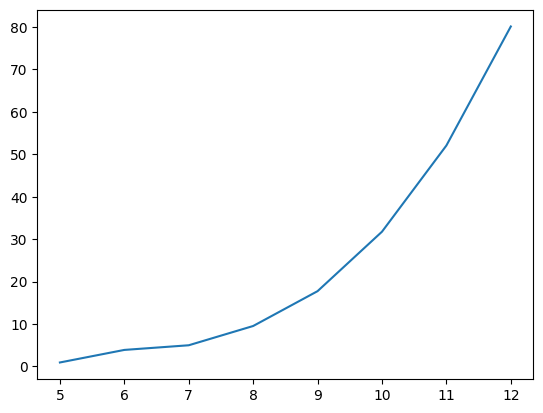

In [181]:
plt.plot(np.arange(5, 13), times)
plt.show()

['W', 'L', 'T', 'E']
[1018    5  477    0]


In [332]:
winner_ind_pos = np.load('winner_index_dac_pos_10000.npy')

In [335]:
(winner_ind_pos < 0).sum()

72